In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import swifter

Here we will add a transformation to the flow, arrivals, and departures called the log-modulus transformation (Found here: https://bit.ly/33Nm8Tm). This transformation is characterized as follows: 

L(x) = sign(x) * log(|x| + 1)

This transformation has several advantages: 

First, it can be applied to positive and negative numbers, so it is applicable for our "flow" axis. This is possible, because it takes the log of the absolute value and multiplies it by the point's sign. 

Second, it preserves zero. This is advantageous, as we have many data points with zero flow, so preserving this is essential. 

Third, it has high interpretability, as it simply applies a logarithmic scale to all data points. 

We choose this transformation because it allows us to standardize the relative scales of our data to make them more comparable. Doing this will allow us to characterize our data more easily.

Here we are applying the log-mod transformation to the following columns: "flow", "arrivals", and "departures". 

Additionally, since "flow" can be either a positive or negative number, we wish to characterize overall activity by taking the absolute value of the "flow" column.

In [2]:
sch_data = pd.read_csv('data/cleaned/schwartau/schwartau.csv') #Read in the data
sch_data['timestamp'] = pd.to_datetime(sch_data['timestamp']) #Ensure that timestamp is a datetime object
sch_data = sch_data.set_index('timestamp')

#Add a column for total activity
sch_data['activity'] = sch_data['flow'].swifter.apply(abs)

#Add a column for log-mod of flow, arrivals, and departures
def logmod(x):
    return np.sign(x) * np.log(abs(x) + 1)

sch_data['logactivity'] = sch_data['activity'].swifter.apply(logmod)
sch_data['logflow'] = sch_data['flow'].swifter.apply(logmod)
sch_data['logarrivals'] = sch_data['arrivals'].swifter.apply(logmod)
sch_data['logdepartures'] = sch_data['departures'].swifter.apply(logmod)

sch_data.head()

,flow,departures,arrivals,temperature,weight,humidity,activity,logactivity,logflow,logarrivals,logdepartures
timestamp,,,,,,,,,,,
2017-01-01 14:15:00,0,0,0,12.340,50.700685,98.610556,0,0.0,0.0,0.0,0.0
2017-01-01 14:30:00,0,0,0,12.356,50.700685,98.610556,0,0.0,0.0,0.0,0.0
2017-01-01 14:45:00,0,0,0,12.492,50.700685,98.610556,0,0.0,0.0,0.0,0.0
2017-01-01 15:00:00,0,0,0,12.454,50.700685,98.610556,0,0.0,0.0,0.0,0.0
2017-01-01 15:15:00,0,0,0,12.378,50.700685,98.610556,0,0.0,0.0,0.0,0.0


Here, we wish to observe some basic statistics about our data, mainly minimums and maximums of each column.

In [3]:
#Print some info about each year
print("Overall data maximums:")
print(sch_data.max())
print("\n\n\n")
print("Overall data minimums:")
print(sch_data.min())

Overall data maximums:
flow             19161.000000
departures        4942.000000
arrivals         19263.000000
temperature         37.526000
weight              92.042231
humidity           100.000000
activity         19161.000000
logactivity          9.860684
logflow              9.860684
logarrivals          9.865993
logdepartures        8.505728
dtype: float64




Overall data minimums:
flow            -2794.000000
departures          0.000000
arrivals            0.000000
temperature        -7.261400
weight             -0.172444
humidity         -100.000000
activity            0.000000
logactivity         0.000000
logflow            -7.935587
logarrivals         0.000000
logdepartures       0.000000
dtype: float64


Plot averages for each year of data that we have

Find the average distance between closest points


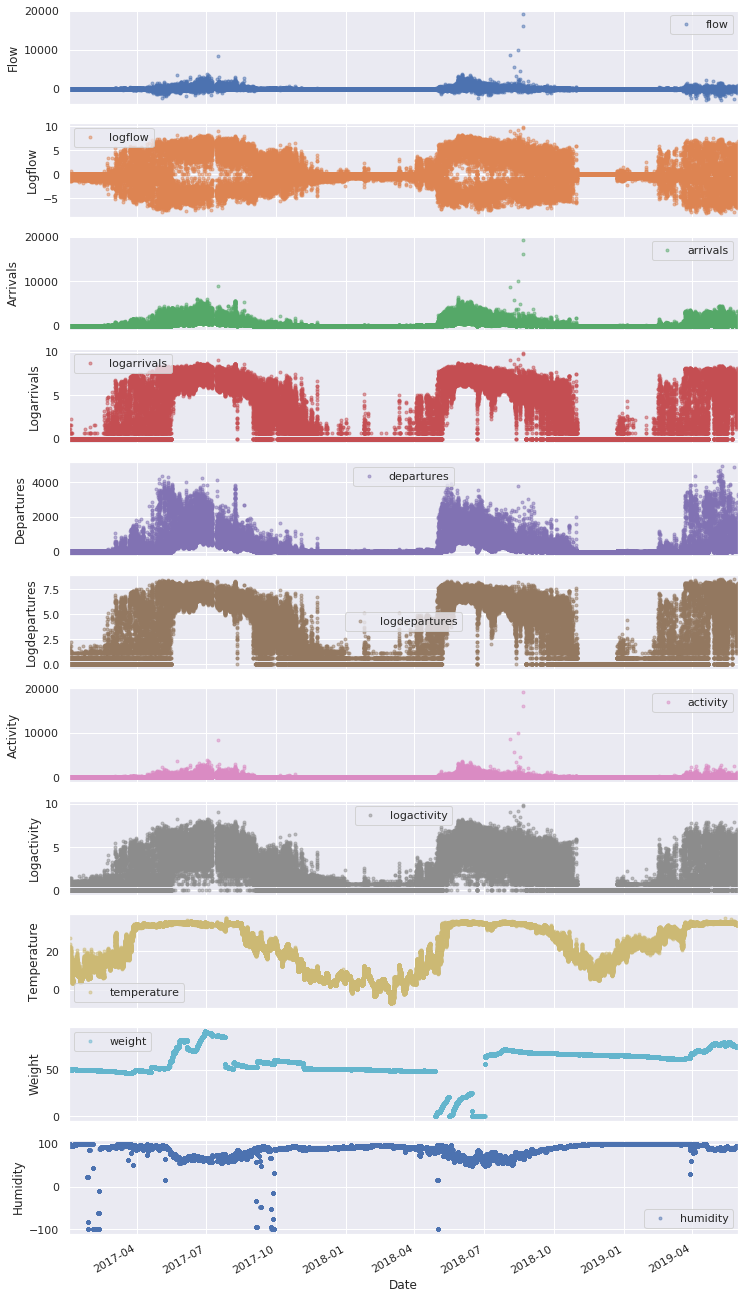

In [6]:
#Set the default figure size with seaborn
sns.set(rc={'figure.figsize':(11, 4)})

data_plots = ['flow', 'logflow', 'arrivals', 'logarrivals', 'departures', 'logdepartures', 'activity', 'logactivity', 'temperature', 'weight', 'humidity']
axes = sch_data[data_plots].plot(marker='.', alpha=0.5, linestyle='None', subplots=True,figsize=(12,25))
for i in range(len(axes)):
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(data_plots[i].capitalize())


In the above graphs we can see clear correlation between the temperature and activity datasets. This indicates some level of seasonality to the data.

Below, we have printed the correlation matrix for the dataset using the spearman method. We chose to use the spearman method of calculating correlation coefficients, because this method is unaffected by non-linear transformations, such as the logmod transformation used above.

In [7]:
sch_data.corr(method="spearman")

,flow,departures,arrivals,temperature,weight,humidity,activity,logactivity,logflow,logarrivals,logdepartures
flow,1.000000,0.052023,0.150391,0.081706,0.028046,-0.074761,0.083734,0.083734,1.000000,0.150391,0.052023
departures,0.052023,1.000000,0.974078,0.720664,0.276148,-0.661955,0.949270,0.949270,0.052023,0.974078,1.000000
arrivals,0.150391,0.974078,1.000000,0.744492,0.288888,-0.659849,0.924636,0.924636,0.150391,1.000000,0.974078
temperature,0.081706,0.720664,0.744492,1.000000,0.425972,-0.460880,0.681434,0.681434,0.081706,0.744492,0.720664
weight,0.028046,0.276148,0.288888,0.425972,1.000000,-0.084218,0.264028,0.264028,0.028046,0.288888,0.276148
humidity,-0.074761,-0.661955,-0.659849,-0.460880,-0.084218,1.000000,-0.647425,-0.647425,-0.074761,-0.659849,-0.661955
activity,0.083734,0.949270,0.924636,0.681434,0.264028,-0.647425,1.000000,1.000000,0.083734,0.924636,0.949270
logactivity,0.083734,0.949270,0.924636,0.681434,0.264028,-0.647425,1.000000,1.000000,0.083734,0.924636,0.949270
logflow,1.000000,0.052023,0.150391,0.081706,0.028046,-0.074761,0.083734,0.083734,1.000000,0.150391,0.052023
logarrivals,0.150391,0.974078,1.000000,0.744492,0.288888,-0.659849,0.924636,0.924636,0.150391,1.000000,0.974078


As predicted, the spearman method of calculating correlation coefficients was not affected by the non-linear log-mod transformation performed earlier. This allows us to verify that analysis done using the log-mod transformed data will still yield the same trends and observations as before. The only difference here is that the observations will be easier to interpret with a more similar relative scale between all of our data points. 

Additionally, an interesting pattern that can be gleaned from the correlation coefficients is that temperature is simply correlated with overall hive "activity" rather than hive "flow". This is likely because flow can be both a positive or negative number, so little correlation exists between seasonal temperatures, and "flow". However, by taking the absolute value of "flow" we can characterize overall hive activity. Again, here we see that temperature is strongly correlated with hive "activity" overall.

<hr>

Below, we continue to characterize our dataset by creating boxplots of our data broken up by month. Note: The data represented in these boxplots comes from all three years of data in our dataset. 

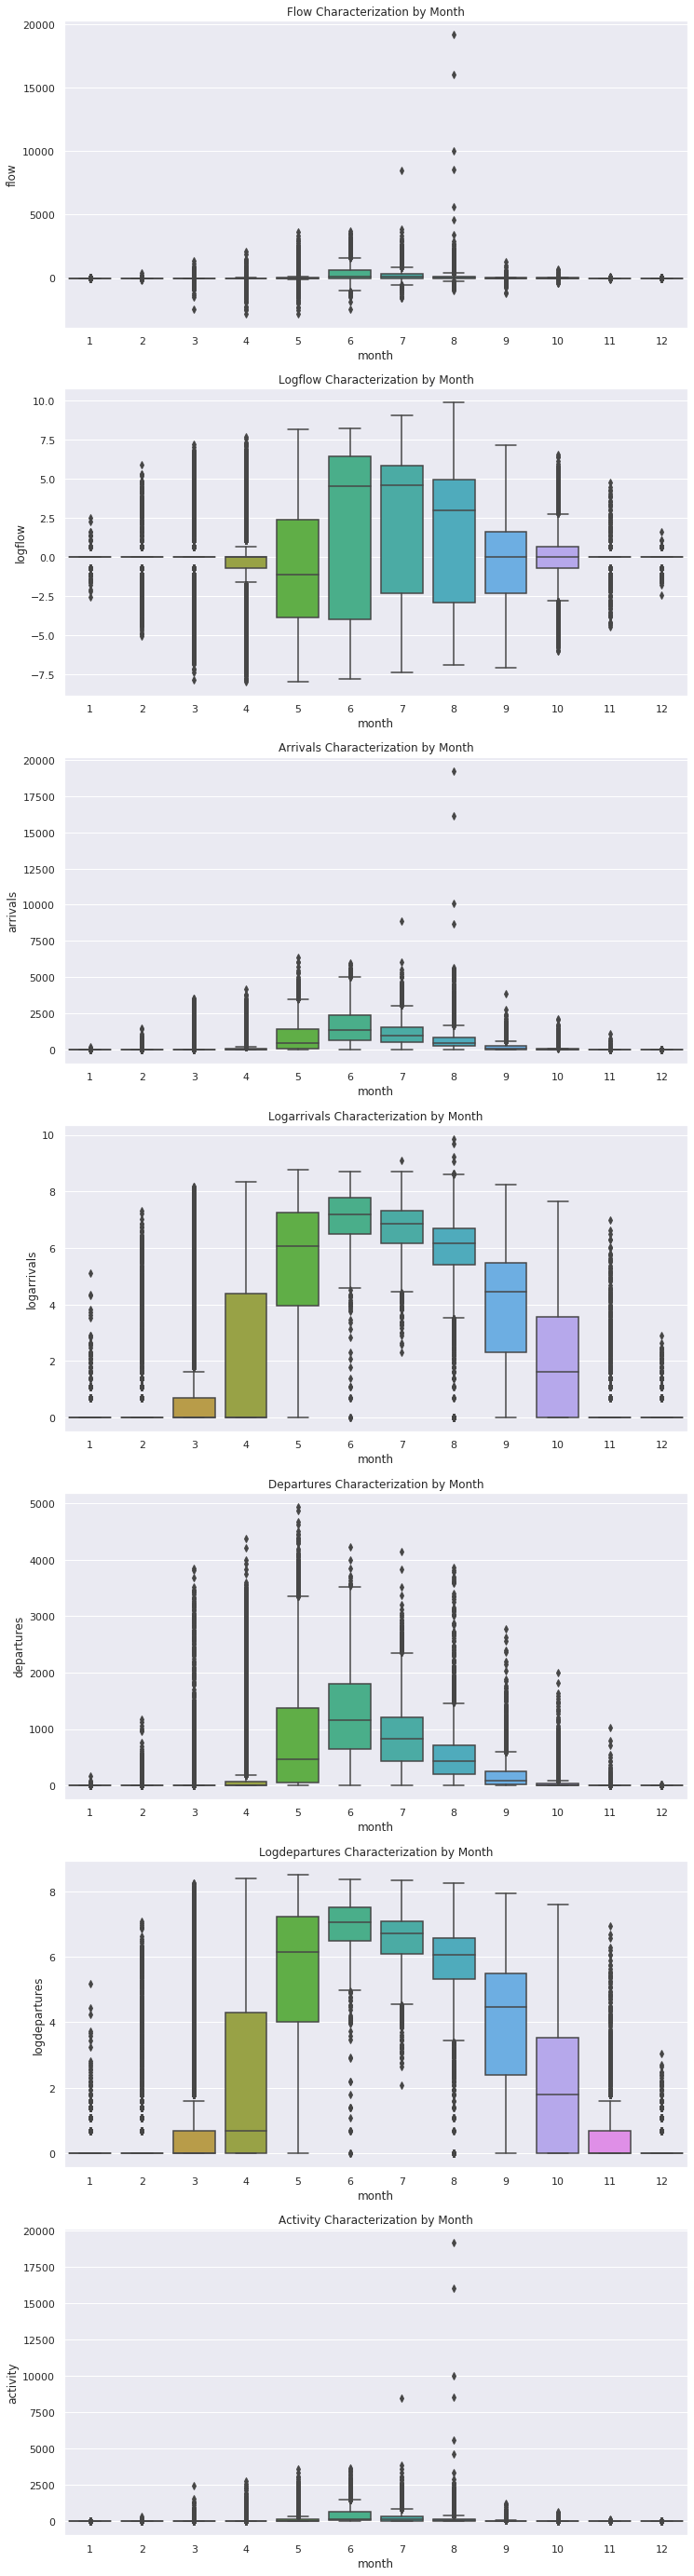

In [8]:
#Add columns to the dataframe with year, month, and weekday name
sch_data['year'] = sch_data.index.year
sch_data['month'] = sch_data.index.month
sch_data['weekday name'] = sch_data.index.weekday_name

seasonal_fig, seasonal_axes = plt.subplots(7, 1, figsize=(12,20))
index = 0
plt.setp(seasonal_axes, xticks=np.arange(12))
seasonal_fig.subplots_adjust(top=2)
for name, ax in zip(data_plots, seasonal_axes):
    sns.boxplot(data=sch_data, x='month', y=name, ax=ax)
    ax.set_title(name.capitalize() + " Characterization by Month")

From the analysis above, we can see that the data is quite tail-heavy, meaning that the tails contain more of the data than would be present in the normal distribution. A kurtosis measure of zero is a dataset taken from the normal distribution. Therefore, it will be useful to characterize the data by finding the kurtosis measures of the data.

In [24]:
print(sch_data.kurtosis())

flow             473.853750
arrivals          15.220388
departures         6.629914
temperature       -1.229894
activity         527.877654
logactivity       -0.550556
logflow            0.425952
logarrivals       -1.478957
logdepartures     -1.502228
year              -1.027699
month             -1.175719
dtype: float64


In [25]:
print(sch_data.skew())

flow             11.106731
arrivals          3.035008
departures        2.523341
temperature      -0.433488
activity         12.519375
logactivity       0.922781
logflow           0.463075
logarrivals       0.499204
logdepartures     0.476098
year              0.399127
month             0.251233
dtype: float64


From the above anlaysis we can see that the kurtosis and skewedness of our measures of hive activity are quite high until we use the log-mod transformation. This is important to note, as it means that there is a non-linear relationship between seasonal temperatures and overall hive activity. 